# Exercise 1

We first load a dataset and examine its dimensions.

In [1]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

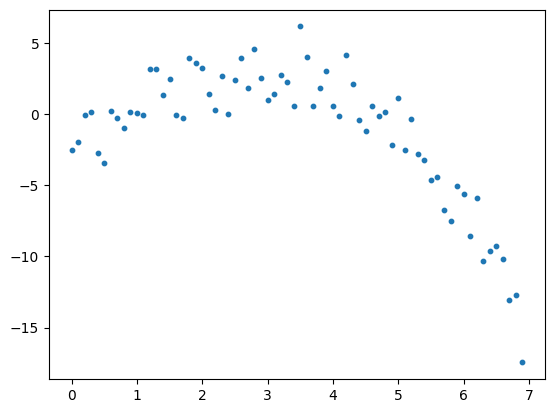

In [3]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

x_data = np.swapaxes(xy_data, 0, 1)[0]
y_data = np.swapaxes(xy_data, 0, 1)[1]

plt.scatter(x_data, y_data, s=10)

### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

In [4]:
def polyreg(data_matrix, k):

    def residual(X, y, beta):
        return y - X@beta

    def sse(X, y, beta):
        res = residual(X, y, beta)
        return res.T @ res
    
    k = len(data_matrix)-1 if k >= len(data_matrix) else k

    x = np.swapaxes(data_matrix, 0, 1)[0]
    y = np.swapaxes(data_matrix, 0, 1)[1]
    
    # Generate X
    X = np.array(list(map(lambda xpt: [xpt**power for power in range(k+1)], x)))

    # Calculate beta
    beta = np.linalg.inv(X.T@X)@X.T@y

    # Get SSE_0
    sse_0 = sse(np.reshape(x, (x.shape[0], 1)), y, np.array([np.sum(y)/len(y)]))

    return beta, (1-sse(X, y, beta)/sse_0), residual(X, y, beta)

def predict(x, beta):
    return beta @ np.array(list(map(lambda xpt: [xpt**power for power in range(len(beta))], x))).T

Use the tests below to check the outputs of the function you have written:

In [5]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

k: 2 - SSE: 172.18, R^2: 0.88799
k: 3 - SSE: 152.41, R^2: 0.90085
k: 4 - SSE: 151.23, R^2: 0.90162


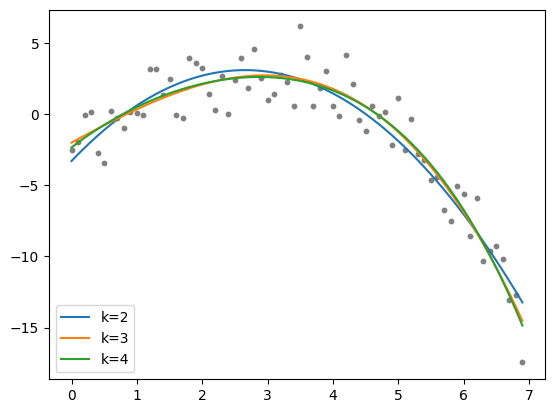

In [6]:
k_vals = [2, 3, 4]

plt.scatter(x_data, y_data, s=10, c='gray')

for k in k_vals:
    beta, r2, res = polyreg(xy_data, k)
    print(f'k: {k} - SSE: {res.T@res:.2f}, R^2: {r2:.5f}')
    poly = predict(x_data, beta)
    plt.plot(x_data, poly, label=f'k={k}')

plt.legend(loc='lower left')
plt.show()

 #### State which model you choose and briefly justify your choice.
 I would choose k=4, as the error is the lowest and the R^2 score is the highest, indicating the best performance. From the indicators, k=4 is the best choice.

 I will also note that the model is the best for interpolating data within this region, but not much can be said about the suitability for extrapolation. For instance, a polynomial of k=4 might overfit the data if the trend is quadratic.

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

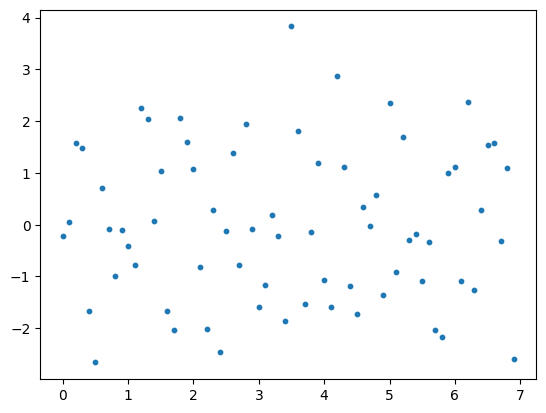

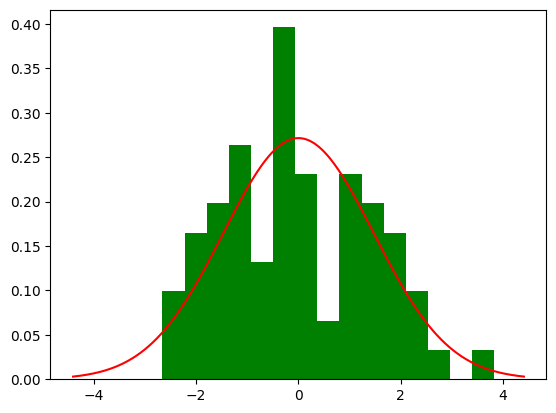

In [7]:
from scipy.stats import norm

k = 4
beta, r2, res = polyreg(xy_data, k)

# Scatter plot
plt.scatter(x_data, res, s=10)
plt.show()

# Histogram
n, bins, patches = plt.hist(res, bins=15, density=True, facecolor='green')

# Plot Gaussian pdf with same mean and variance as the residuals
res_stdev = np.std(res)  #standard deviation of residuals
xvals = np.linspace(-3*res_stdev,3*res_stdev,1000)
plt.plot(xvals, norm.pdf(xvals, loc=0, scale=res_stdev), 'r')
plt.show()